<a href="https://colab.research.google.com/github/Xujjjjun2002/AI/blob/main/Inception_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn
import torch.nn as F 
import torchsummary as summary

In [2]:
class BasicConv(nn.Module):
  def __init__(self,in_channels,out_channels,kernel_size,stride=1,padding=0):
    super(BasicConv,self).__init__()
    self.conv = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size,stride=stride,padding=padding)
    self.bn = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLU(inplace=True)
  def forward(self,x):
    x = self.conv(x)
    x = self.bn(x)
    x = self.relu(x)
    return x

In [3]:
class StemModel(nn.Module):
  def __init__(self):
    super(StemModel,self).__init__()
    self.conv_1 = BasicConv(3,32,3,2)
    self.conv_2 = BasicConv(32,32,3)
    self.conv_3 = BasicConv(32,64,3,padding=1)
    self.maxpool_4 = nn.MaxPool2d(kernel_size=3,stride=2)
    self.conv_4 = BasicConv(64,96,3,2)
    self.left_6 = nn.Sequential(
      BasicConv(160,64,1),
      BasicConv(64,96,3)
      )
    self.right_6 = nn.Sequential(
        BasicConv(160,64,1),
        BasicConv(64,64,(7,1),padding=(3,0)),
        BasicConv(64,64,(1,7),padding=(0,3)),
        BasicConv(64,96,3)
    )
    self.left_7 = BasicConv(192,192,3,stride=2)
    self.right_7 = nn.MaxPool2d(kernel_size=3,stride=2)

  def forward(self,x):
    x = self.conv_1(x)
    x = self.conv_2(x)
    x = self.conv_3(x)
    x11 = self.maxpool_4(x)
    x12 = self.conv_4(x)
    x = torch.cat([x11,x12],dim=1)
    x21 = self.left_6(x)
    x22 = self.right_6(x)
    x = torch.cat([x21,x22],dim=1)
    x31 = self.left_7(x)
    x32 = self.right_7(x)
    x = torch.cat([x31,x32],dim=1)
    return x

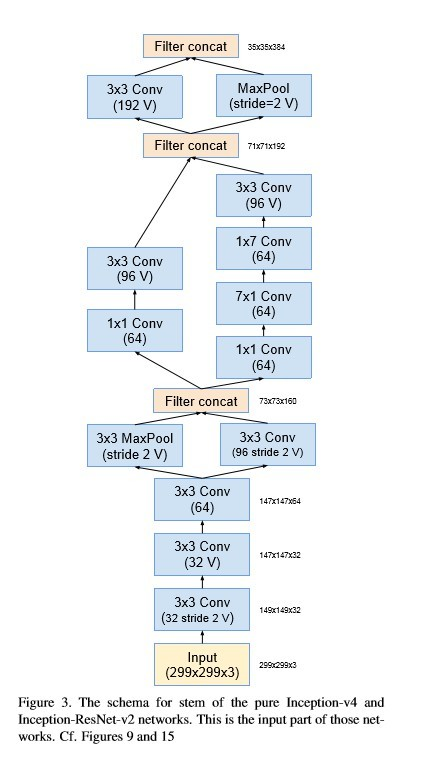

In [4]:
class Inception_A(nn.Module):
  def __init__(self,in_channels):
    super(Inception_A,self).__init__()
    self.b1 = nn.Sequential(
        nn.AdaptiveAvgPool2d((35)),
        BasicConv(in_channels=in_channels,out_channels=96,kernel_size=1)
    )
    self.b2 = BasicConv(in_channels,96,1)
    self.b3 = nn.Sequential(
        BasicConv(in_channels,64,1),
        BasicConv(64,96,3,padding=1)
    )
    self.b4 = nn.Sequential(
        BasicConv(in_channels,64,1),
        BasicConv(64,96,3,padding=1),
        BasicConv(96,96,3,padding=1)
    )
    

  def forward(self,x):
    x1 = self.b1(x)
    x2 = self.b2(x)
    x3 = self.b3(x)
    x4 = self.b4(x)
    x = torch.cat([x1,x2,x3,x4],dim=1)
    return x
    

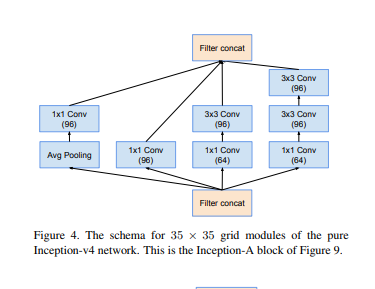

In [5]:
class Inception_B(nn.Module):
  def __init__(self,in_channels):
    super(Inception_B,self).__init__()
    self.b1 = nn.Sequential(
        nn.AdaptiveAvgPool2d((17)),
        BasicConv(in_channels,128,1)
    )
    self.b2 = BasicConv(in_channels,384,1)
    self.b3 = nn.Sequential(
        BasicConv(in_channels,192,1),
        BasicConv(192,224,(1,7),padding=(0,3)),
        BasicConv(224,256,(1,7),padding=(0,3))
    )
    self.b4 = nn.Sequential(
        BasicConv(in_channels,192,1),
        BasicConv(192,192,(1,7),padding=(0,3)),
        BasicConv(192,224,(7,1),padding=(3,0)),
        BasicConv(224,224,(1,7),padding=(0,3)),
        BasicConv(224,256,(7,1),padding=(3,0))       
    )

  def forward(self,x):
    x1 = self.b1(x)
    x2 = self.b2(x)
    x3 = self.b3(x)
    x4 = self.b4(x)
    x = torch.cat([x1,x2,x3,x4],dim=1)
    return x

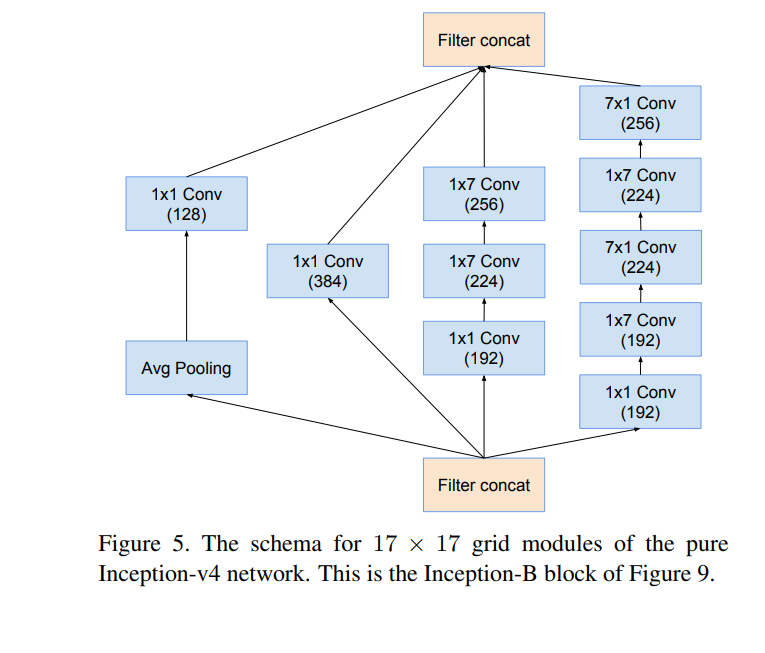

In [11]:
class Inception_C(nn.Module):
  def __init__(self,in_channels):
    super(Inception_C,self).__init__()
    self.b1 = nn.Sequential(
        nn.AdaptiveAvgPool2d((8)),
        BasicConv(in_channels,256,1)
    )
    self.b2 = BasicConv(in_channels,256,1)
    self.b3_step1 = BasicConv(in_channels,384,1)
    self.b3_step21 = BasicConv(384,256,(1,3),padding=(0,1))
    self.b3_step22 = BasicConv(384,256,(3,1),padding=(1,0))
    self.b4_step1 = nn.Sequential(
        BasicConv(in_channels,384,1),
        BasicConv(384,448,(1,3),padding=(0,1)),
        BasicConv(448,512,(3,1),padding=(1,0))
    )
    self.b4_step21 = BasicConv(512,256,(3,1),padding=(1,0))
    self.b4_step22 = BasicConv(512,256,(1,3),padding=(0,1))
  def forward(self,x):
    x1 = self.b1(x)
    x2 = self.b2(x)
    x31 = self.b3_step1(x)
    x3_step21 = self.b3_step21(x31)
    x3_step22 = self.b3_step22(x31)
    x41 = self.b4_step1(x)
    x4_step21 = self.b4_step21(x41)
    x4_step22 = self.b4_step22(x41)
    x = torch.cat([x1,x2,x3_step21,x3_step22,x4_step21,x4_step22],dim=1)
    return x

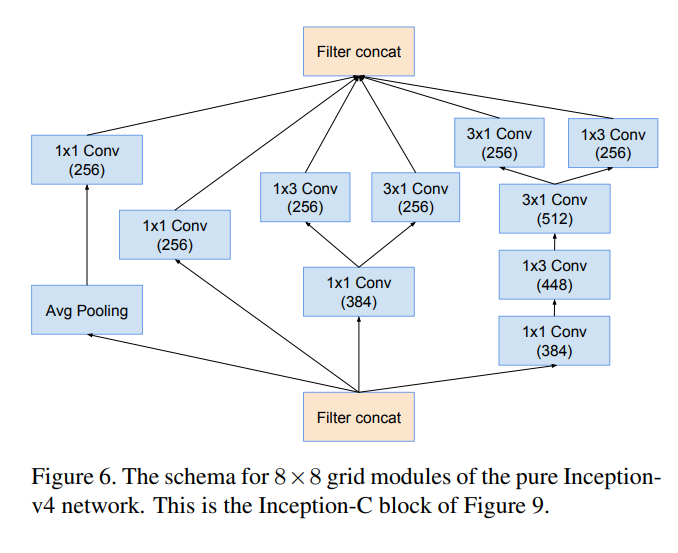

In [7]:
class Reduction_A(nn.Module):
  def __init__(self,in_channels):
    super(Reduction_A,self).__init__()
    self.b1 = nn.MaxPool2d(kernel_size=3,stride=2)
    self.b2 = BasicConv(in_channels,out_channels=384,kernel_size=3,stride=2)
    self.b3 = nn.Sequential(
        BasicConv(in_channels,192,1),
        BasicConv(192,224,3,padding=1),
        BasicConv(224,256,3,stride=2)
    )

  def forward(self,x):
    x1 = self.b1(x)
    x2 = self.b2(x)
    x3 = self.b3(x)
    x = torch.cat([x1,x2,x3],dim=1)
    return x

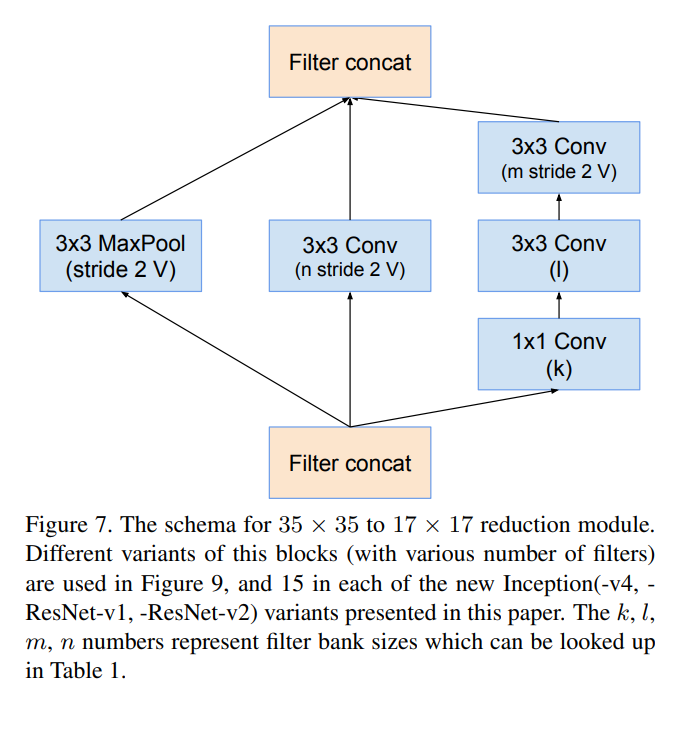

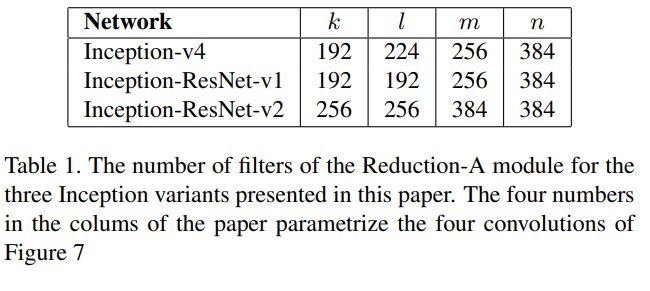



In [8]:
class Reduction_B(nn.Module):
  def __init__(self,in_channels):
    super(Reduction_B,self).__init__()
    self.b1 = nn.MaxPool2d(kernel_size=3,stride=2)
    self.b2 = nn.Sequential(
        BasicConv(in_channels,192,1),
        BasicConv(192,192,3,stride=2)
    )
    self.b3 = nn.Sequential(
        BasicConv(in_channels,256,1),
        BasicConv(256,256,(1,7),padding=(0,3)),
        BasicConv(256,320,(7,1),padding=(3,0)),
        BasicConv(320,320,3,stride=2)
    )
  def forward(self,x):
    x1 = self.b1(x)
    x2 = self.b2(x)
    x3 = self.b3(x)
    x = torch.cat([x1,x2,x3],dim=1)
    return x

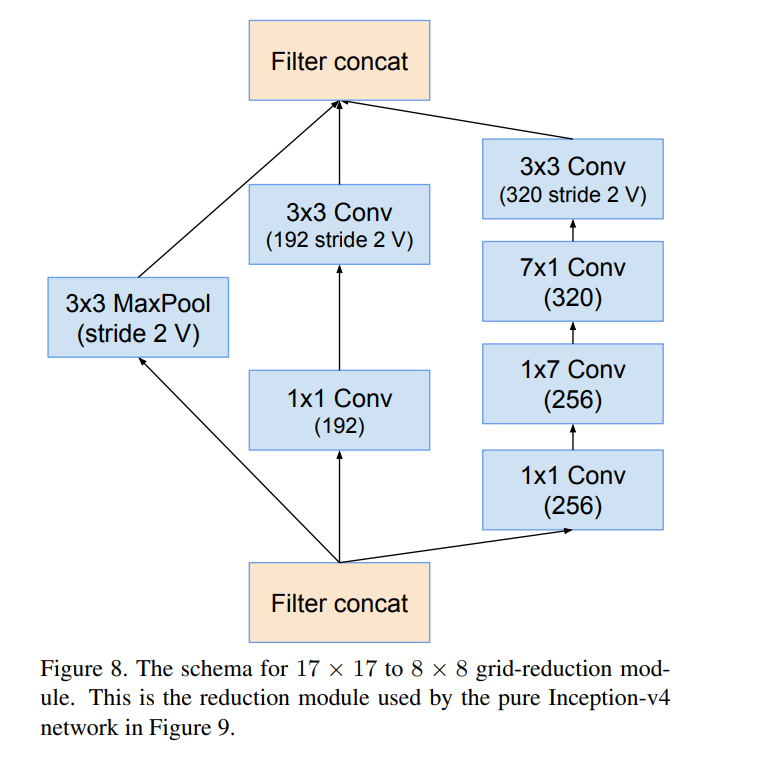

In [23]:
class Inception_v4(nn.Module):
  def __init__(self,num_classes):
    super(Inception_v4,self).__init__()
    self.stem = StemModel()
    self.inception_A = nn.Sequential(
      Inception_A(in_channels=384),
      Inception_A(in_channels=384),
      Inception_A(in_channels=384),
      Inception_A(in_channels=384)
    )
    self.reduction_A = Reduction_A(in_channels=384)
    self.inception_B = nn.Sequential(
        Inception_B(in_channels=1024),
        Inception_B(in_channels=1024),
        Inception_B(in_channels=1024),
        Inception_B(in_channels=1024),
        Inception_B(in_channels=1024),
        Inception_B(in_channels=1024),
        Inception_B(in_channels=1024)
        )
    self.reduction_B = Reduction_B(in_channels=1024)
    self.inception_C = nn.Sequential(
        Inception_C(in_channels=1536),
        Inception_C(in_channels=1536),
        Inception_C(in_channels=1536)
    )
    self.avgpool = nn.AdaptiveAvgPool2d((1))
    self.flatten = nn.Flatten()
    self.fc = nn.Linear(in_features=1536,out_features=num_classes)
  def forward(self,x):
    x = self.stem(x)
    x = self.inception_A(x)
    x = self.reduction_A(x)
    x = self.inception_B(x)
    x = self.reduction_B(x)
    x = self.inception_C(x)
    x = self.avgpool(x)
    x = self.flatten(x)
    torch.dropout(x,0.2,train=True)
    x = self.fc(x)
    x = torch.softmax(x,dim=1)
    return x

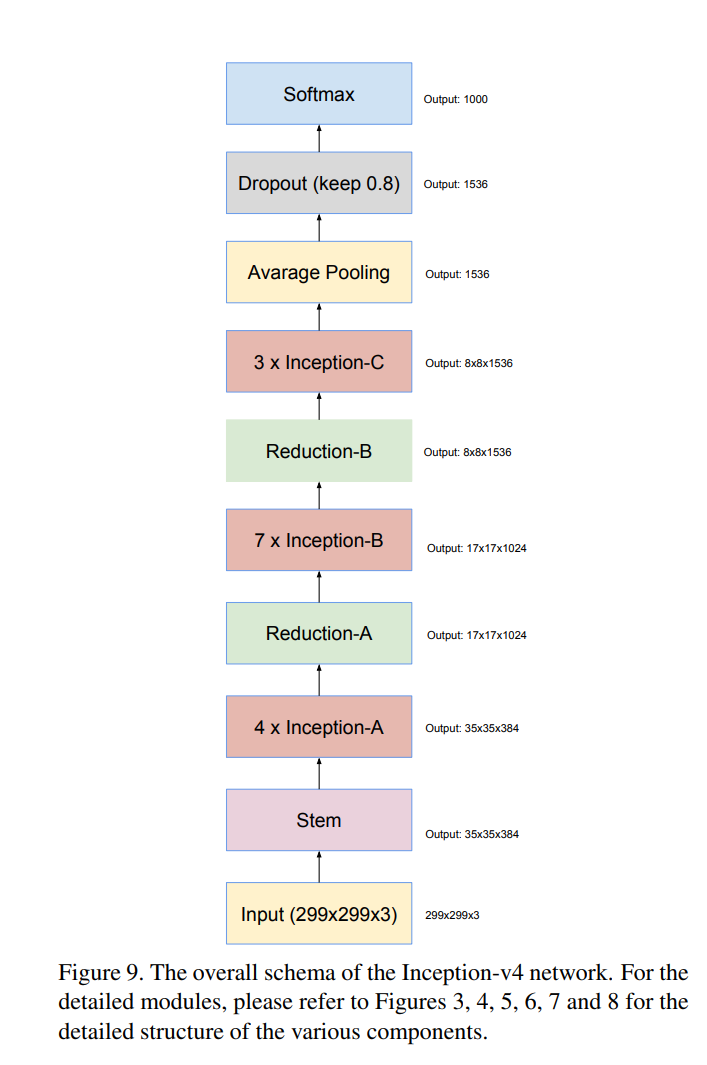

In [24]:
if __name__ == '__main__':
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  input = torch.ones([1,3,299,299])
  input = input.to(device)
  model = Inception_v4(num_classes=2)
  model.to(device)
  output = model(input)
  print("output.shape=",output.shape)

output.shape= torch.Size([1, 2])
